# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "starter_code/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [105]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

In [106]:
api_key = weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url+"city_name").json()

# Test the response
#response
print(query_url)
#print(requests.get(url))


http://api.openweathermap.org/data/2.5/weather?appid=5df497b6d90ff98866da82ab010cabc8&units=imperial&q=


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [107]:
# url from openweather
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&"
# Lists for storing values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

In [108]:
# Looping through cities & making the API call
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
    # extracting data and cleaning data & print cleaned data
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City name not found.")

Processing record 1|hobart
Processing record 2|araripe
Processing record 3|ongole
Processing record 4|nikolskoye
Processing record 5|tuktoyaktuk
Processing record 6|kedrovyy
Processing record 7|omsukchan
Processing record 8|yarada
Processing record 9|bengkulu
Processing record 10|hermanus
Processing record 11|hilo
Processing record 12|nasirabad
Processing record 13|butaritari
Processing record 14|kruisfontein
Processing record 15|bluff
Processing record 16|birao
Processing record 17|yellowknife
City name not found.
Processing record 18|gimli
Processing record 19|punta arenas
Processing record 20|busselton
Processing record 21|atuona
Processing record 22|vaini
Processing record 23|hammerfest
Processing record 24|pisco
Processing record 25|faanui
Processing record 26|solnechnyy
City name not found.
Processing record 27|gladstone
Processing record 28|vao
Processing record 29|puerto triunfo
Processing record 30|saint-philippe
Processing record 31|puerto ayora
Processing record 32|sao gabri

Processing record 250|victoria
Processing record 251|gelemso
Processing record 252|takayama
Processing record 253|la reforma
Processing record 254|armidale
Processing record 255|rio grande
Processing record 256|launceston
Processing record 257|kungurtug
Processing record 258|san quintin
Processing record 259|leningradskiy
Processing record 260|kasangulu
Processing record 261|kaitangata
Processing record 262|shubarkuduk
Processing record 263|mahebourg
Processing record 264|umm lajj
Processing record 265|flinders
Processing record 266|varca
Processing record 267|beni mazar
Processing record 268|tarakan
Processing record 269|namibe
Processing record 270|arraial do cabo
Processing record 271|vestmanna
Processing record 272|rio claro
Processing record 273|sokoni
Processing record 274|poya
Processing record 275|yerbogachen
Processing record 276|marsa matruh
Processing record 277|itarema
Processing record 278|atar
City name not found.
Processing record 279|mizdah
Processing record 280|khorram

Processing record 500|velikiy ustyug
Processing record 501|luganville
Processing record 502|coihaique
Processing record 503|el tejar
Processing record 504|curanilahue
Processing record 505|slupsk
Processing record 506|hami
Processing record 507|tiarei
City name not found.
Processing record 508|alenquer
Processing record 509|dhidhdhoo
Processing record 510|evensk
Processing record 511|simao
Processing record 512|cockburn town
City name not found.
Processing record 513|vytegra
City name not found.
Processing record 514|caconda
Processing record 515|bollnas
Processing record 516|qasigiannguit
Processing record 517|narrabri
Processing record 518|balao
Processing record 519|manhush
Processing record 520|pendleton
Processing record 521|shar
Processing record 522|heilbron
Processing record 523|shimanovsk
Processing record 524|tezu
Processing record 525|tsurugi
Processing record 526|bonavista
Processing record 527|srednekolymsk
Processing record 528|riyadh
Processing record 529|matamoros
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [109]:
# Convert extracted data into df
city_dataframe = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_dataframe = city_dataframe.rename_axis('City SN')


In [110]:
# run a quick count of all the columns to make sure that each city has complete data sets
city_dataframe.count()

City          581
Cloudiness    581
Country       581
Date          581
Humidity      581
Lat           581
Lng           581
Max Temp      581
Wind Speed    581
dtype: int64

In [111]:
city_dataframe['Max Temp'].describe()

count    581.000000
mean      12.882461
std       15.557821
min      -34.130000
25%        2.170000
50%       17.470000
75%       25.070000
max       40.000000
Name: Max Temp, dtype: float64

In [113]:
# Create csv file & export data 
city_dataframe.to_csv("city_data.csv")

# Show df
city_dataframe.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City SN,,,,,,,,,
0,Hobart,75,AU,1584217206,81,-42.88,147.33,11.67,2.60
1,Araripe,100,BR,1584217295,93,-7.21,-40.05,22.97,1.71
2,Ongole,0,IN,1584217295,85,15.50,80.05,23.77,2.64
3,Nikolskoye,97,RU,1584217295,38,59.70,30.79,-3.00,10.00
4,Tuktoyaktuk,90,CA,1584217295,85,69.45,-133.04,-6.00,11.80
5,Kedrovyy,95,RU,1584217295,47,56.17,91.82,3.00,3.00
6,Omsukchan,100,RU,1584217295,97,62.53,155.80,-22.03,0.15
7,Yārāda,20,IN,1584217295,94,17.65,83.27,23.00,1.00
8,Bengkulu,95,ID,1584217296,91,-3.80,102.27,23.67,1.46


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

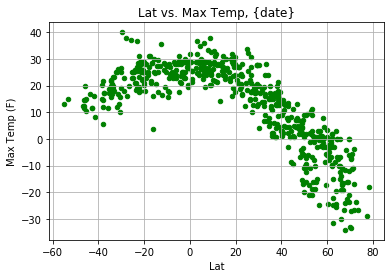

In [114]:
# Things to do before showing plots:
## Tried to convert date time from unix time system, 10 digit value
x_values = city_dataframe["Lat"]
y_values = city_dataframe["Max Temp"]
# date = time.strftime('%m''/''%d''/''%y')

plt.scatter(x_values, y_values, s=20, color = "green")
plt.title("Lat vs. Max Temp, {date}")
plt.ylabel("Max Temp (F)")
plt.xlabel("Lat")
plt.grid(True)
plt.show()

# The closer a city is to 0,'lat' also the equator, the warmer the weather will be.

#### Latitude vs. Humidity Plot

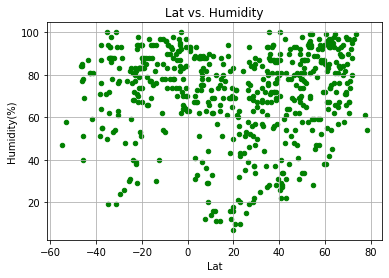

In [115]:
plt.scatter(city_dataframe["Lat"], city_dataframe["Humidity"], s=20, color = "green")

plt.title("Lat vs. Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Lat")
plt.grid(True)

plt.show()

## Data points seems to be everywhere, not conclusive

#### Latitude vs. Cloudiness Plot

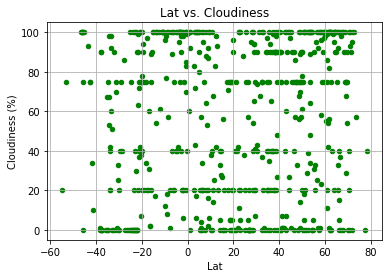

In [116]:
plt.scatter(city_dataframe["Lat"], city_dataframe["Cloudiness"], s=20, color = "green")

plt.title("Lat vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Lat")
plt.grid(True)

plt.show()

#### Latitude vs. Wind Speed Plot

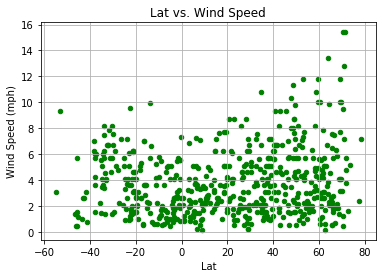

In [117]:
plt.scatter(city_dataframe["Lat"], city_dataframe["Wind Speed"], s=20, color = "green")

plt.title("Lat vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Lat")
plt.grid(True)

plt.show()

## Linear Regression

In [129]:
# Create Northern and Southern Hemisphere DataFrames
nothern_hemisphere = city_dataframe.loc[city_dataframe["Lat"] >= 0.0]
nothern_hemisphere.reset_index(inplace=True)
nothern_hemisphere

,City SN,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,2,Ongole,0,IN,1584217295,85,15.50,80.05,23.77,2.64
1,3,Nikolskoye,97,RU,1584217295,38,59.70,30.79,-3.00,10.00
2,4,Tuktoyaktuk,90,CA,1584217295,85,69.45,-133.04,-6.00,11.80
3,5,Kedrovyy,95,RU,1584217295,47,56.17,91.82,3.00,3.00
4,6,Omsukchan,100,RU,1584217295,97,62.53,155.80,-22.03,0.15
...,...,...,...,...,...,...,...,...,...,...
391,573,Paitan,100,PH,1584217434,89,6.66,124.87,19.37,0.22
392,574,Altos del Rosario,2,CO,1584217434,29,8.79,-74.17,37.67,2.08
393,577,Balkanabat,100,TM,1584217435,31,39.51,54.37,17.57,1.75
394,578,Buloh Kasap,20,MY,1584217435,88,2.55,102.76,26.67,1.50


In [130]:
# Southern Hemisphere DataFrames
southern_hemisphere = city_dataframe[city_dataframe["Lat"] < 0.0]
southern_hemisphere.reset_index(inplace=True)
southern_hemisphere

,City SN,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Hobart,75,AU,1584217206,81,-42.88,147.33,11.67,2.60
1,1,Araripe,100,BR,1584217295,93,-7.21,-40.05,22.97,1.71
2,8,Bengkulu,95,ID,1584217296,91,-3.80,102.27,23.67,1.46
3,9,Hermanus,53,ZA,1584217296,88,-34.42,19.23,18.33,5.99
4,13,Kruisfontein,42,ZA,1584217296,93,-34.00,24.73,16.77,3.39
...,...,...,...,...,...,...,...,...,...,...
180,570,Ambilobe,100,MG,1584217434,85,-13.20,49.05,27.47,6.59
181,572,Letlhakeng,100,BW,1584217434,40,-24.09,25.03,25.67,1.78
182,575,Cidreira,0,BR,1584217435,83,-30.18,-50.21,24.97,7.55
183,576,Achacachi,89,BO,1584217435,94,-16.05,-68.68,3.77,2.81


In [145]:
# OPTIONAL: Create a function to create Linear Regression plots

def linearregression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    print('---------------------------------------------')
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.grid(True)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8888581302606015
---------------------------------------------


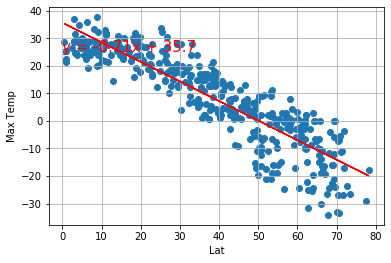

In [146]:
#Create a Scatter Plot for Lattitude vs Temperature of City
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (0,25)
linearregression(nothern_hemisphere[xlbl],nothern_hemisphere[ylbl],xlbl,ylbl,lblpos,5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5493707350944337
---------------------------------------------


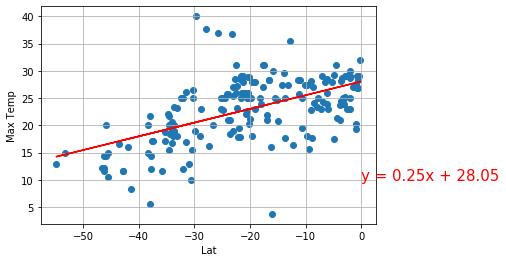

In [147]:
# Southern_Hemisphere - Max Temp vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (0,10)
linearregression(southern_hemisphere[xlbl],southern_hemisphere[ylbl],xlbl,ylbl,lblpos,6)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2802247867935862
---------------------------------------------


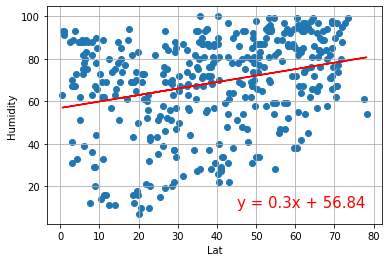

In [138]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
linearregression(nothern_hemisphere[xlbl],nothern_hemisphere[ylbl],xlbl,ylbl,lblpos,7)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22167868907437321
---------------------------------------------


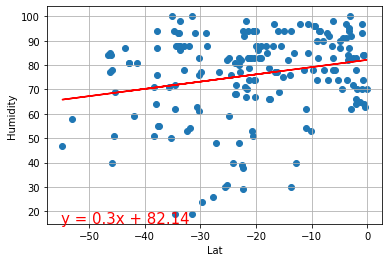

In [139]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,15)
linearregression(southern_hemisphere[xlbl],southern_hemisphere[ylbl],xlbl,ylbl,lblpos,8)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.17662336107840257
---------------------------------------------


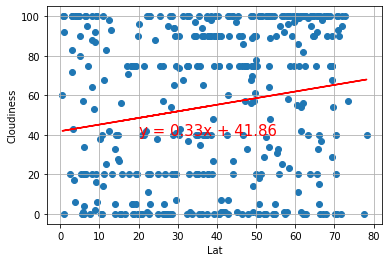

In [140]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,40)
linearregression(nothern_hemisphere[xlbl],nothern_hemisphere[ylbl],xlbl,ylbl,lblpos,10)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2321006059762285
---------------------------------------------


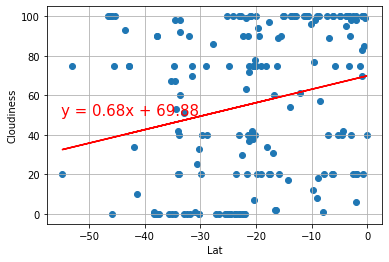

In [141]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression¶
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,50)
linearregression(southern_hemisphere[xlbl],southern_hemisphere[ylbl],xlbl,ylbl,lblpos,10)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2424654130843273
---------------------------------------------


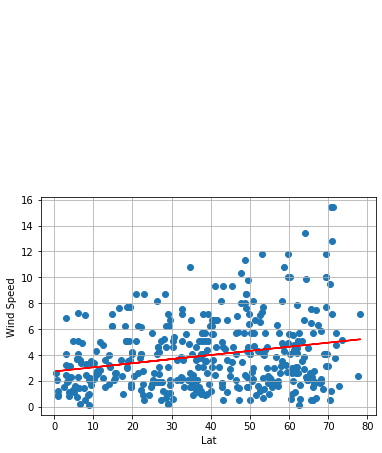

In [142]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
linearregression(nothern_hemisphere[xlbl],nothern_hemisphere[ylbl],xlbl,ylbl,lblpos,9)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.19382696416834783
---------------------------------------------


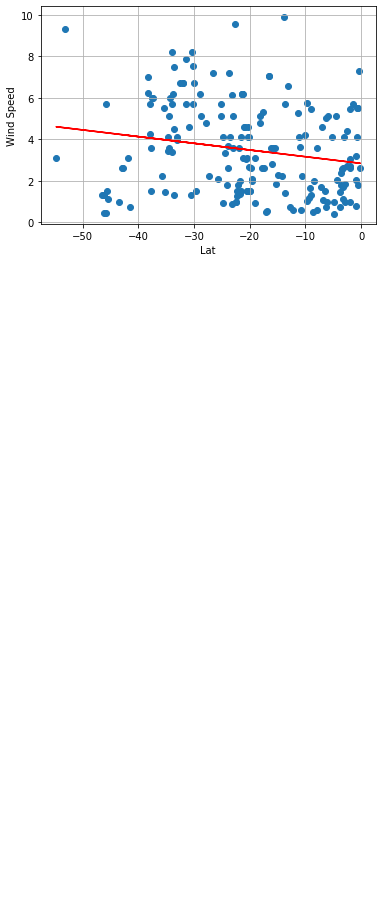

In [143]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-25,-33)
linearregression(southern_hemisphere[xlbl],southern_hemisphere[ylbl],xlbl,ylbl,lblpos,12)